# Impact

In [1]:
# to import gammaALPs, this cell should be only executed once after kernel restart
%cd ..
%cd ..

/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/notebooks
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs


/home/flandgraf/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
import numpy as np
import matplotlib.pyplot as plt

import healpy as hp
import time

fatal: No names found, cannot describe anything.


In [96]:
EGeV = np.logspace(-1., 3., 101)  # the energy range, roughly matching the Fermi-LAT energy range (100 MeV - 500 GeV)
src = Source(z=0.017559, ra='03h19m49.9s', dec='+41d30m49.2s')  # position of NGC 1275
pa_in = np.diag([0., 0., 1.])  # the inital polarization matrix; a pure ALP state

m = 2.5
g = 0.5

ml = [ModuleList(ALP(m=m, g=g), src, pin=pa_in, EGeV=EGeV, seed=0) for i in range(10)]

models = ['base', 'expX', 'neCL', 'twistX', 'nebCor', 'cre10', 'synCG', 'spur']
for i in range(8):
    ml[i].add_propagation("GMF", 0, model='UF23', UF23_model=models[i])

ml[8].add_propagation("GMF", 0, model="jansson12")
ml[9].add_propagation("GMF", 0, model="pshirkov")

environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi


In [97]:
px, py, pa = np.zeros((3, 10, EGeV.size))
for i in range(10):
    px[i], py[i], pa[i] = ml[i].run()

   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>


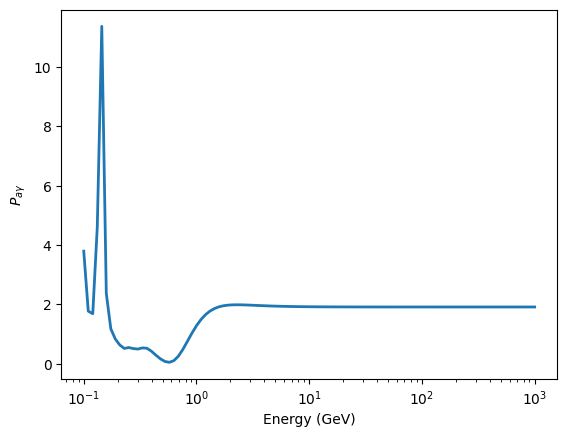

In [99]:
i=9
b=2
plt.semilogx(EGeV, (px[i]+py[i])/(px[b] + py[b]), lw = 2)
# plt.semilogx(EGeV, (px[2] + py[2]), lw = 2)
plt.xlabel("Energy (GeV)")
plt.ylabel(r"$P_{a\gamma}$")

#plt.ylim(0.039, 0.08)
#plt.ylim(0, 1.2)
plt.show()